Moringa Data Science Prep Independent Project: Week 4

Question

In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Questions for consideration:

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
Bonus Questions

What is the most popular hour for returning cars?
What station is the most popular? Overall? At the most popular picking hour?
What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code? Overall? At the most popular picking hour?
Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?

In [2]:
# Importing libarires needed for the analysis
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
#loading dataset 1 and displaying the first 5 rows
#
data_url = 'http://bit.ly/autolib_dataset'
datacars = pd.read_csv(data_url)
datacars.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [16]:
# Exploring our data by Information check for dataset1
#
datacars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [17]:
# Exploring data by checking shape of our dataset
#
datacars.shape

(5000, 25)

In [18]:
#Exploring data by checking columns
#
datacars.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [19]:
#cleaning data by dropping unwanted columns
#
datacars.drop(['Cars', 'Displayed comment'], axis = 1, inplace = True)



In [20]:
#check for current shape after dropping the two columns
#
datacars.shape

(5000, 23)

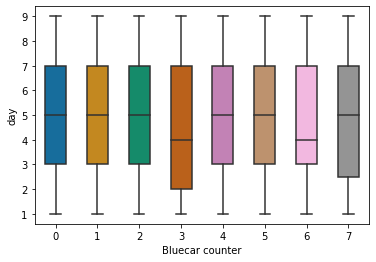

In [21]:
#checking for bluecar outliers by day
#
bplot=sns.boxplot( x ='Bluecar counter', y= 'day',
                 data=datacars, 
                 width=0.5,
                 palette="colorblind")

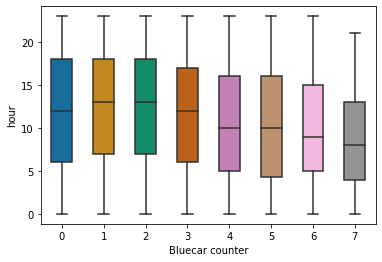

In [22]:
#checking for bluecar outliers by hour
#
bplot=sns.boxplot( x ='Bluecar counter', y= 'hour',
                 data=datacars, 
                 width=0.5,
                 palette="colorblind")

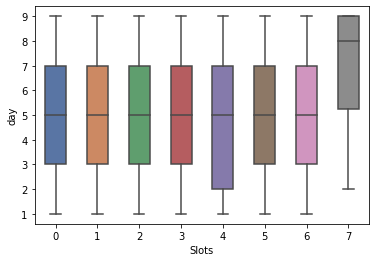

In [23]:
#checking for outliers of slots by day
#
bplot2=sns.boxplot( x ='Slots', y='day',
                 data=datacars, 
                 width=0.5,
                 palette="deep")

In [32]:
#Checking for missing data
# the 'scheduled at' column has alot of missing values as seen below.
#
datacars.isnull().sum()

Address                   0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [30]:
# dropping duplicates
#
datacars = datacars.drop_duplicates()

In [31]:
#checking for current shape after dropping duplicates.
#
datacars.shape

(5000, 23)

In [33]:
# removing spaces and converting column names to lower case
#
datacars.columns = datacars.columns.str.strip().str.lower().str.replace(' ', '_')

In [34]:
# adding 3  columns that will provide the status for the three cars.
# positive number means that a car was returned
# negative number means that a car was picked
# zero means that nothing happened
#
datacars['bluecar_status'] = datacars.bluecar_counter.diff()
datacars['utilib_status'] = datacars.utilib_counter.diff()
datacars['utilib_14_status'] = datacars["utilib_1.4_counter"].diff()


In [37]:
#displaying first three columns to check for the additional columns
#
datacars.head(3)

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,scheduled_at,slots,station_type,status,subscription_status,year,month,day,hour,minute,bluecar_status,utilib_status,utilib_14_status
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,NaN,NaN,NaN
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,6.0,0.0,0.0
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,-3.0,0.0,2.0


Performing Data Analysis

Blue Car

In [38]:
# Question 1
# What is the most popular hour of the day for picking up an electric blue car?
#
datacars[(datacars.city == 'Paris') & (datacars.bluecar_status < 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
21    80
Name: hour, dtype: int64

In [39]:
# Question 2
# What is the most popular hour of the day for returning blue cars?
#
datacars[datacars.bluecar_status > 0].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
6    101
Name: hour, dtype: int64

In [40]:
# Question 3
# Which station are blue cars mostly picked?
#
datacars[(datacars['bluecar_status'] < 0)& (datacars['status']=='ok')&(datacars['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Paris/Vincent Auriol/143    5
Name: public_name, dtype: int64

In [41]:
# Question 4
# Which station are blue cars mostly returned?
# 
datacars[(datacars['bluecar_status'] > 0)& (datacars['status']=='ok')&(datacars['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Colombes/MarÃ©chal Joffre/30    5
Name: public_name, dtype: int64

In [42]:
# Question 5
# Which is the most popular postal code for picking blue cars?
#
datacars[(datacars['bluecar_status'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    116
Name: postal_code, dtype: int64

In [43]:
# Question 6
# Which is the most popular postal code for returning blue cars?
#
datacars[(datacars['bluecar_status'] > 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    112
Name: postal_code, dtype: int64

Utilib Analysis

In [44]:
# Question 1
# What is the most popular hour of the day for picking up an electric utilib car?
#
datacars[(datacars.city == 'Paris') & (datacars.utilib_status < 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
19    12
Name: hour, dtype: int64

In [45]:
# Question 2
# What is the most popular hour of the day for returning utilib cars?
#
datacars[datacars.utilib_status > 0].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]


hour
5    17
Name: hour, dtype: int64

In [46]:
# Question 3
# Which station are utilib cars mostly picked from?
#
datacars[(datacars['utilib_status'] < 0)& (datacars['status']=='ok')&(datacars['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Villeneuve-la-Garenne/Verdun/30    2
Name: public_name, dtype: int64

In [47]:
# Question 4
# Which station are utilib cars mostly returned?
#
datacars[(datacars['utilib_status'] > 0)& (datacars['status']=='ok')&(datacars['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Alfortville/Malleret/16    2
Name: public_name, dtype: int64

In [48]:
# Question 5
# Which is the most popular postal code for picking utilib cars?
#
datacars[(datacars['utilib_status'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    22
Name: postal_code, dtype: int64

In [49]:
# Question 6
# Which is the most popular postal code for picking utilib cars?
#
datacars[(datacars['utilib_status'] > 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75016    20
Name: postal_code, dtype: int64

Utilib 1.4 Analysis

In [50]:
# Question 1
# What is the most popular hour of the day for picking up an electric utilib 1.4 car?
#
datacars[(datacars.city == 'Paris') & (datacars['utilib_14_status'] < 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
3    20
Name: hour, dtype: int64

In [51]:
# Question 2
# What is the most popular hour of the day for returning utilib 1.4 cars?
#
datacars[(datacars.city == 'Paris') & (datacars.utilib_status > 0)].groupby('hour')['hour'].count().sort_values(ascending = False)[0:1]

hour
6    12
Name: hour, dtype: int64

In [52]:
# Question 3
# Which station are utilib 1.4 cars mostly picked from?
#
datacars[(datacars['utilib_14_status'] < 0)& (datacars['status']=='ok')&(datacars['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Courbevoie/AndrÃ© Prothin/12    3
Name: public_name, dtype: int64

In [53]:
# Question 4
# Which station are utilib 1.4 cars mostly returned?
#
datacars[(datacars['utilib_14_status'] > 0)& (datacars['status']=='ok')&(datacars['subscription_status']=='operational')].groupby('public_name')['public_name'].count().sort_values(ascending= False)[0:1]

public_name
Suresnes/Verdun/15    3
Name: public_name, dtype: int64

In [54]:
# Question 5
# Which is the most popular postal code for picking utilib 1.4 cars?
#
datacars[(datacars['utilib_14_status'] < 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75015    35
Name: postal_code, dtype: int64

In [55]:
# Question 6
# Which is the most popular postal code for picking utilib 1.4 cars?
# 
datacars[(datacars['utilib_14_status'] > 0)].groupby('postal_code')['postal_code'].count().sort_values(ascending= False)[0:1]

postal_code
75017    33
Name: postal_code, dtype: int64